# Uber Data Analysis
#### Version 0.2

A more advanced analysis of a user's Uber Trips. This is the second version of this notebook that works with the Uber_Data scraper v0.2.3+

#### Questions Answered

`[*] Work in progress`

- 1) What is the total number of rides per month?
- 2) Top 10 rides completed with the same driver?
- 3) Total cost of rides per month?
- 4) Total cost of rides per week?
- 5) Average ride cost per year?
- 6) Average ride cost per week?
- 7) Most expensive ride per year?
- 8) Top 15 max number of rides per day per year?
- 9) Average number of rides per week per month?
- 10) Number of Free rides distributed per month of year?
- 11) Number of Canceled rides distributed per month of year?
- 12) Total time spent in Uber Rides [*]
- 13) Distribution of ride cost per ride time [*]

In [1]:
# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

import numpy as np
import pandas as pd
import matplotlib as plt
import sys
import datetime as dt

# Enable inline plotting
%matplotlib inline

# Style the plots
plt.style.use('ggplot')

In [2]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + plt.__version__)

Python version 3.6.1 (default, Apr  4 2017, 09:40:21) 
[GCC 4.2.1 Compatible Apple LLVM 8.1.0 (clang-802.0.38)]
Pandas version 0.19.2
Matplotlib version 2.0.0


In [3]:
file_location = r'~/Projects/uber_receipts/_data/1480540889.csv'
# Read the CSV file and add custom header names
raw_data = pd.read_csv(file_location, header=None, names=['date', 
                                                          'driver', 
                                                          'fare', 
                                                          'car_type', 
                                                          'city', 
                                                          'trip_id', 
                                                          'pickup_address',
                                                          'pickup_date',
                                                          'dropoff_address',
                                                          'dropoff_date'])

In [4]:
#
# DATA CLEANUP
# 
# Handle missing data
raw_data['fare'].replace(r'\s+', np.nan, regex=True)
raw_data['pickup_date'].replace(r'\s+', np.nan, regex=True)
raw_data['dropoff_date'].replace(r'\s+', np.nan, regex=True)
# Convert date fields to datetime objects
raw_data['date'] = pd.to_datetime(raw_data['date'], format='%Y-%m-%d')
raw_data['pickup_date'] = pd.to_datetime(raw_data['pickup_date'], format='%Y-%m-%d %H:%M')
raw_data['dropoff_date'] = pd.to_datetime(raw_data['dropoff_date'], format='%Y-%m-%d %H:%M')
# Set the date as the index of the DataFrame
raw_data.set_index('date', inplace=True)

In [5]:
# Remove the currency sign from the beginning of the Fare
# 
# Major assumption here is that the currency
# is un USD -- Change the value of
# currency_sign depending on the currency of your
# account
currency_sign = '$'
raw_data['fare'] = raw_data.fare.str.replace(currency_sign, '')

In [6]:
# Split the Paid rides / Canceled rides and Free rides
# into 3 separate data frames
paid_rides = raw_data.copy(deep=True)
paid_rides.dropna(subset=['fare'], inplace=True)
paid_rides = paid_rides[paid_rides['fare'] != 'Canceled']
paid_rides['fare'] = pd.to_numeric(paid_rides['fare'], errors='coerce').fillna(0)
paid_rides['trip_id'].count()

168

In [7]:
# Canceled Rides
canceled_rides = raw_data[raw_data['fare'] == "Canceled"]
canceled_rides['trip_id'].count()

30

In [8]:
# Free Rides have empty fare fields
free_rides = raw_data[raw_data['fare'].isnull()]
free_rides['trip_id'].count()

2

### #1) What is the total number of rides per month?

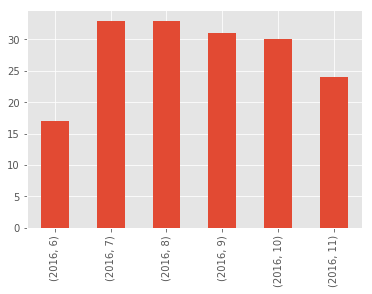

In [9]:
p = paid_rides['fare'].groupby([paid_rides.index.year, paid_rides.index.month]).count()
p.plot(kind='bar')

### #2) Top 10 rides completed with the same driver?

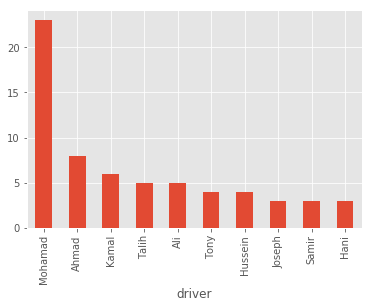

In [10]:
p = paid_rides['driver'].groupby(paid_rides.driver).count().sort_values(ascending=False)[:10]
p.plot(kind='bar')

### #3) Total cost of rides per month?

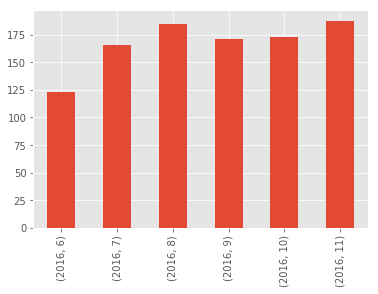

In [11]:
p = paid_rides['fare'].groupby([paid_rides.index.year, paid_rides.index.month]).sum()
p.plot(kind='bar')

### #4) Total cost of rides per week?

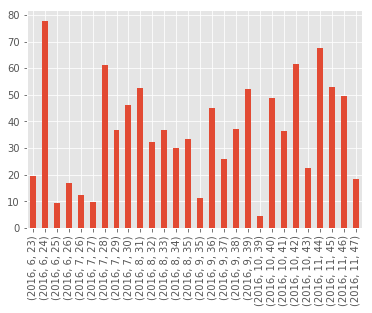

In [12]:
p = paid_rides['fare'].groupby([paid_rides.index.year, paid_rides.index.month, paid_rides.index.week]).sum()
p.plot(kind='bar')

### #5) Average ride cost per year?

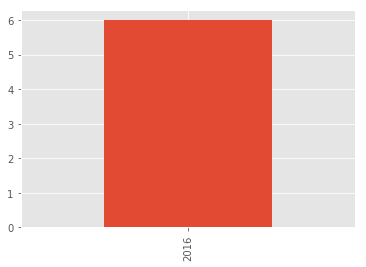

In [13]:
p = paid_rides['fare'].groupby(paid_rides.index.year).mean()
p.plot(kind='bar')

### #6) Average ride cost per week?

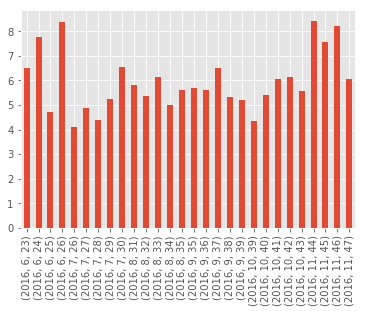

In [14]:
p = paid_rides['fare'].groupby([paid_rides.index.year, paid_rides.index.month, paid_rides.index.week]).mean()
p.plot(kind='bar')

### #7) Most expensive ride per year?

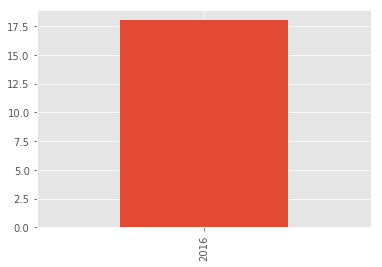

In [15]:
p = paid_rides['fare'].groupby([paid_rides.index.year]).max()
p.plot(kind='bar')

### #8) Top 15 max number of rides per day per year?

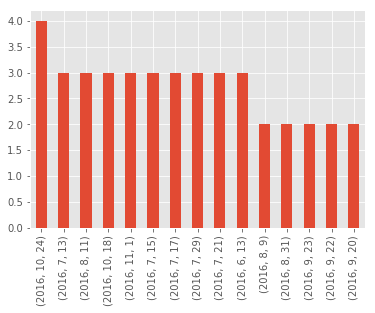

In [16]:
p = paid_rides['fare'].groupby([paid_rides.index.year, paid_rides.index.month, paid_rides.index.day]).count()
p = p.sort_values(ascending=False)[:15]
p.plot(kind='bar')

### #9) Average number of rides per week per month?

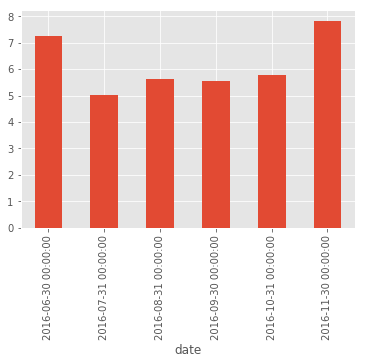

In [17]:
p = paid_rides['fare'].groupby(pd.TimeGrouper(freq='M')).mean()
p.plot(kind='bar')

### #10) Number of Free rides distributed per month of year?

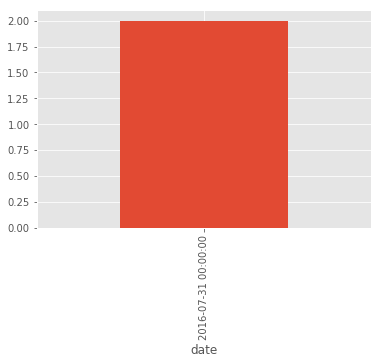

In [18]:
p = free_rides['trip_id'].groupby(pd.TimeGrouper(freq='M')).count()
p.plot(kind='bar')

### #11) Number of Canceled rides distributed per month of year?

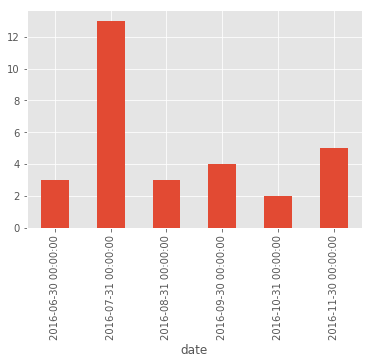

In [19]:
p = canceled_rides['trip_id'].groupby(pd.TimeGrouper(freq='M')).count()
p.plot(kind='bar')

### #12) Total time spent in Uber Rides

### #13) Distribution of ride cost per ride time